## Microsoft Movie Studio Analysis


### Overview
#### Microsoft wants to venture into the film industry. This project analysis will enable them make an informed decision based on the best performing film categories, profitability of the different movie genres both in the local(USA) and global markets as well as the ratings.

### Business Problem
#### Microsoft would like to expand their business niche due to the current trends where fellow big companies have been exploring and thriving on creating video content. They have created a new video studio but do not have the information to enable them make an informed decision on the kind of films to create, how to make profits, and generally how to set themselves apart in order to be the market leaders in this industry and remain relevant.

#### Data Understanding
##### I will be analyzing data from three movie websites: IMDB(Internet Movie Database), The MovieDB, The Numbers. The file im.db will be queried with SQLite. Lets dig in the data.

##### Load Libraries


In [539]:
import pandas as pd
import numpy as np
import sqlite3
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.Data Analysis
##### From bom.movie_gross.csv file

In [540]:
movie_gross = pd.read_csv('data\\bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [541]:
#view the DataFrame first 5 rows
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [542]:
#view the DataFrame last 5 rows
movie_gross.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [543]:
#check the column names
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [544]:
#check the data information
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [545]:
#From the above cell, We have missing data in 3 of the columns.
"""
Studio, domestic_gross and foreign_gross.
"""

'\nStudio, domestic_gross and foreign_gross.\n'

In [546]:
#check the statistical descriptive analysis
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### 1.a Data Cleaning 
##### bom.movie_gross.csv

In [547]:
#check the sum of the null values.
movie_gross.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [548]:
#we will drop the rows that are null for the column studio and domestic_gross since this will not affect our data.
movie_gross.dropna(subset=['studio'], inplace=True)
movie_gross.dropna(subset=['domestic_gross'], inplace=True)
movie_gross.isna().sum()


title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [549]:
#the % of missing values for the foreign_gross column is too high to consider dropping the row
#we can consider to change the data type to float from object then use the fillna method
# Replace 'None' strings with NaN
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].replace('None', pd.NA)

# Convert the 'foreign_gross' column to float, handling missing values
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Display the result
print(movie_gross['foreign_gross'])

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3356, dtype: float64


In [550]:
#there seems to be outliers in this column after first considering to use the measure of central tendancy
#to fill the null values. 
print(movie_gross['foreign_gross'].mean())
print(movie_gross['foreign_gross'].median())

75979668.67282717
19600000.0


In [551]:
#lets us drop the column and remain with the domestic gross as our statistical measure for this dataset.
cleaned_movie_gross = movie_gross.drop('foreign_gross', axis=1)

In [552]:
#change the year dtype from int to object
cleaned_movie_gross['year'] = cleaned_movie_gross['year'].astype(str)
cleaned_movie_gross

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [553]:
cleaned_movie_gross['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 255, dtype: int64

##### Visualization
##### What is the distribution of movies by studio?


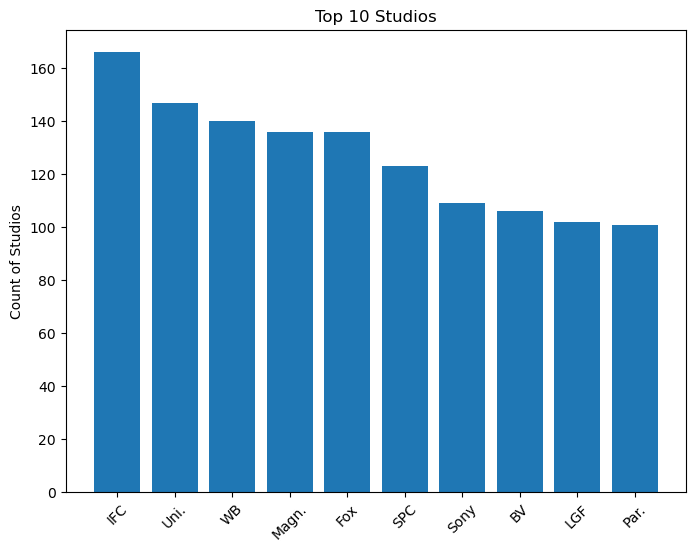

In [554]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
value_counts = cleaned_movie_gross['studio'].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Studios")
ax1.set_title("Top 10 Studios");

In [555]:
cleaned_movie_gross['year'].value_counts().sort_values()

year
2018    308
2017    320
2010    322
2013    345
2014    390
2012    393
2011    396
2016    433
2015    449
Name: count, dtype: int64

#### Visualization
##### What is the count of movies per year

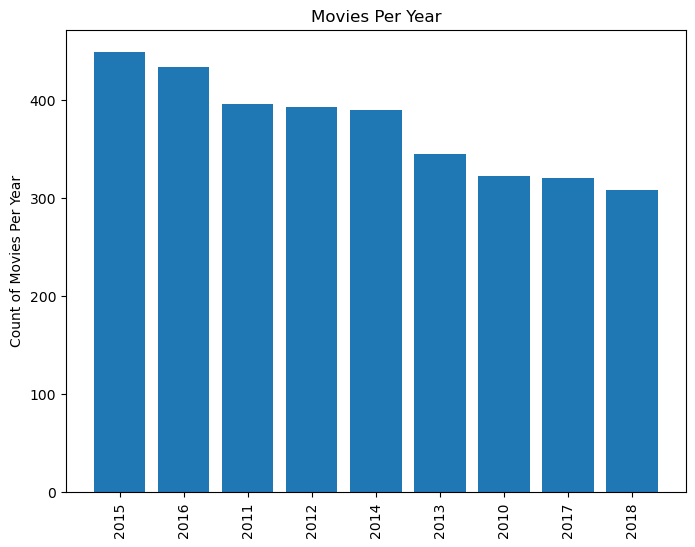

In [556]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
value_counts = cleaned_movie_gross['year'].value_counts()
top_10_counts = value_counts.iloc[:10]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Count of Movies Per Year")
ax1.set_title("Movies Per Year");

In [557]:
#grouped the year categories with the domestic gross
grouped = cleaned_movie_gross.groupby(['year'])['domestic_gross'].mean().reset_index()
grouped

,year,domestic_gross
0,2010,3.154295e+07
1,2011,2.541436e+07
2,2012,2.767584e+07
3,2013,3.128212e+07
4,2014,2.650700e+07
5,2015,2.461338e+07
6,2016,2.598996e+07
7,2017,3.416646e+07
8,2018,3.601042e+07


#### Visualization 
##### Domestic gross performance per year

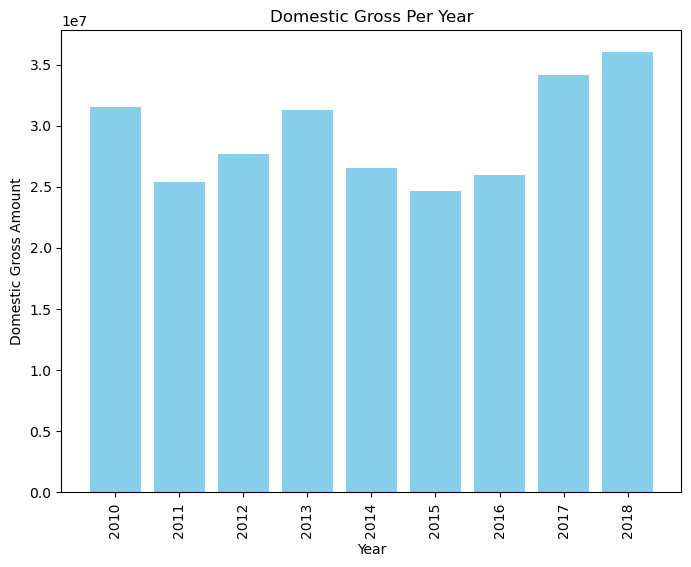

In [558]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
grouped = cleaned_movie_gross.groupby(['year'])['domestic_gross'].mean().reset_index()

# Plot data
ax1.bar(grouped['year'], grouped['domestic_gross'], color='skyblue')
# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Year")
ax1.set_ylabel("Domestic Gross Amount")
ax1.set_title("Domestic Gross Per Year");

In [559]:
#we are able to see the domestic gross per title and studio
grouped_domestic_gross = cleaned_movie_gross.groupby(['studio','title'])['domestic_gross'].mean().reset_index()
grouped_domestic_gross.sort_values(by='domestic_gross',ascending=False).head(10)

,studio,title,domestic_gross
256,BV,Star Wars: The Force Awakens,936700000.0
198,BV,Black Panther,700100000.0
193,BV,Avengers: Infinity War,678800000.0
2861,Uni.,Jurassic World,652300000.0
229,BV,Marvel's The Avengers,623400000.0
257,BV,Star Wars: The Last Jedi,620200000.0
221,BV,Incredibles 2,608600000.0
252,BV,Rogue One: A Star Wars Story,532200000.0
195,BV,Beauty and the Beast (2017),504000000.0
212,BV,Finding Dory,486300000.0


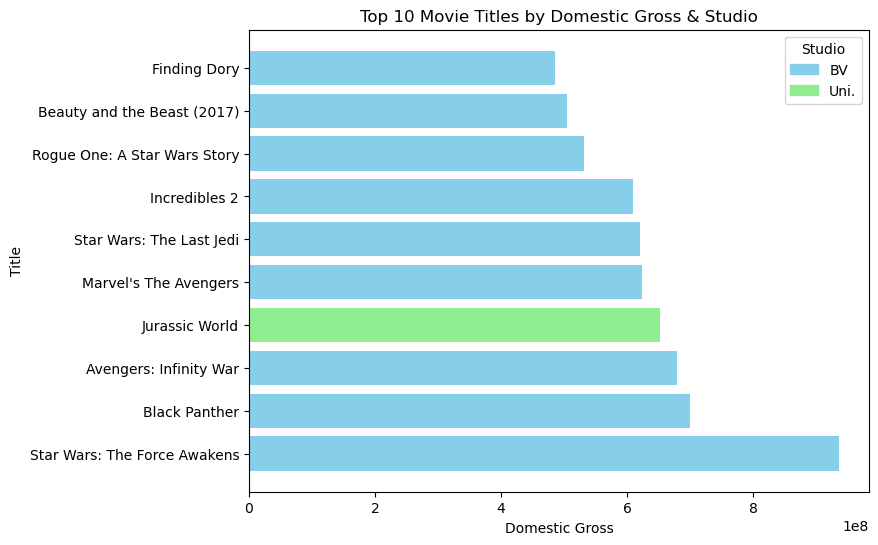

In [560]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create variables for easier reuse
grouped_domestic_gross = cleaned_movie_gross.groupby(['studio','title'])['domestic_gross'].mean().reset_index()
top_10_domestic_gross = grouped_domestic_gross.sort_values(by='domestic_gross',ascending=False).head(10)

#define colors for each studio
studio_colors= {
    'BV': 'skyblue',
    'Uni.': 'lightgreen'
}
# Plot data with colors based on studio
for i, row in top_10_domestic_gross.iterrows():
    ax1.barh(row['title'], row['domestic_gross'], color=studio_colors[row['studio']])

# Create a legend
handles = [plt.Rectangle((0,0),1,1, color=studio_colors[studio]) for studio in studio_colors]
labels = list(studio_colors.keys())
ax1.legend(handles, labels, title="Studio")    

# Customize appearance
ax1.tick_params(axis="x")
ax1.set_xlabel("Domestic Gross")
ax1.set_ylabel("Title")
ax1.set_title("Top 10 Movie Titles by Domestic Gross & Studio");


#### 2. Data Analysis
##### From rt.movie_info.tsv

In [561]:
movie_rating = pd.read_csv('data\\rt.movie_info.tsv', delimiter = '\t')
movie_rating


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [562]:
#to view the first 5 rows from the movie_rating dataset
movie_rating.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [563]:
#to view the last 5 elements of the dataset
movie_rating.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [564]:
#to check the columns
movie_rating.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [565]:
#to check the statistical data of the dataset
movie_rating.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [566]:
#to check the info on the dataset
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [567]:
#we have nulls in the 11 columns.
""" 
The only column that is not null is the ID column
 We need to drop the rows with the null synopsis,rating,genre,runtime and 
 then drop the currency,box_office and studio columns
 since the null values are more than 50%
"""

' \nThe only column that is not null is the ID column\n We need to drop the rows with the null synopsis,rating,genre,runtime and \n then drop the currency,box_office and studio columns\n since the null values are more than 50%\n'

In [568]:
#dropped the synopsis, rating, genre and runtime null rows
movie_rating.dropna(subset=['synopsis'], inplace=True)
movie_rating.dropna(subset=['rating'], inplace=True)
movie_rating.dropna(subset=['genre'], inplace=True)
movie_rating.dropna(subset=['runtime'], inplace=True)
movie_rating.isna().sum()

id                 0
synopsis           0
rating             0
genre              0
director         171
writer           394
theater_date     291
dvd_date         291
currency        1144
box_office      1144
runtime            0
studio           994
dtype: int64

In [569]:
#dropped the null columns and viewed the first 5 rows of the movie_rating_cleaned set.
movie_rating_cleaned = movie_rating.drop([
    'director', 'writer', 'theater_date', 'dvd_date',
    'box_office', 'currency', 'studio'
    ], axis=1)
movie_rating_cleaned.head()

,id,synopsis,rating,genre,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,95 minutes


In [570]:
movie_genres = movie_rating_cleaned['genre'].value_counts()
movie_genres.head(10)

genre
Drama                                              141
Comedy                                             109
Comedy|Drama                                        78
Drama|Mystery and Suspense                          65
Art House and International|Drama                   57
Action and Adventure|Drama|Mystery and Suspense     40
Action and Adventure|Drama                          40
Drama|Romance                                       33
Comedy|Romance                                      32
Art House and International|Comedy|Drama            30
Name: count, dtype: int64

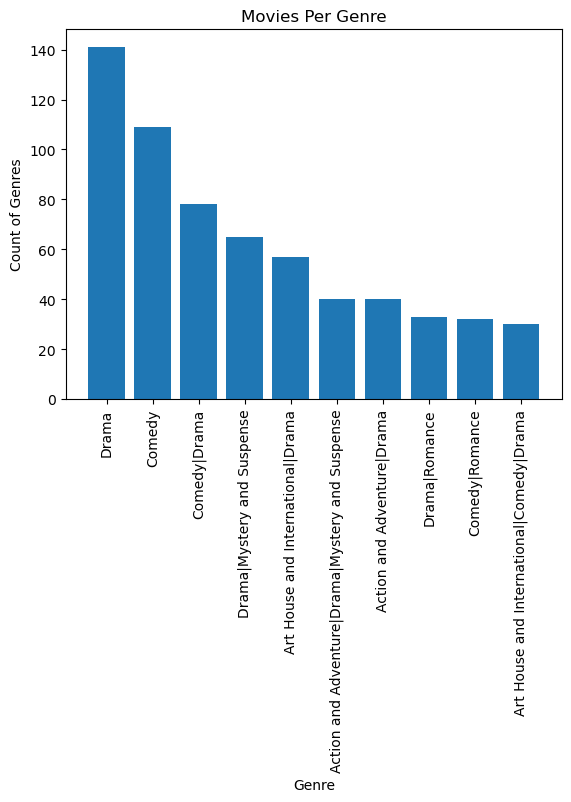

In [571]:
fig, ax = plt.subplots()

movie_genres = movie_rating_cleaned['genre'].value_counts()
top_10_genres = movie_genres.head(10)

# Plot the data
ax.bar(top_10_genres.index, top_10_genres.values)

# Customize the appearance
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Genre')
ax.set_ylabel('Count of Genres')
ax.set_title('Movies Per Genre');

# Show the plot
plt.show()

In [572]:
#changed the runtime column from object to integer so as to calculate the statistical analysis.
movie_rating_cleaned['runtime'] = movie_rating_cleaned['runtime'].str.replace('minutes', '').astype(int)
movie_rating_cleaned

,id,synopsis,rating,genre,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,104
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,108
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,116
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,128
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,95
...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,106
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,88
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,111
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101


In [573]:
#grouped the genre and rating column and got the mean runtime for each of the categories.
genre_runtime = movie_rating_cleaned.groupby(['genre', 'rating'])['runtime'].mean().reset_index()
genre_runtime.sort_values(by='runtime', ascending=False)

,genre,rating,runtime
56,Action and Adventure|Classics|Documentary,NR,290.000000
283,Classics|Drama,PG-13,229.000000
241,Art House and International|Drama|Romance,R,196.666667
209,Art House and International|Comedy|Kids and Fa...,NR,192.000000
68,Action and Adventure|Classics|Drama|Western,G,180.000000
...,...,...,...
393,Documentary|Drama|Special Interest,R,57.000000
279,Classics|Documentary|Drama|Romance,NR,52.000000
405,Documentary|Special Interest|Sports and Fitness,G,45.000000
176,Animation|Special Interest,NR,41.500000


In [576]:
#to check the value counts of the rating column
movie_ratings = movie_rating_cleaned['rating'].value_counts()
movie_ratings

rating
R        517
NR       437
PG       239
PG-13    232
G         56
NC17       1
Name: count, dtype: int64

##### Visualization

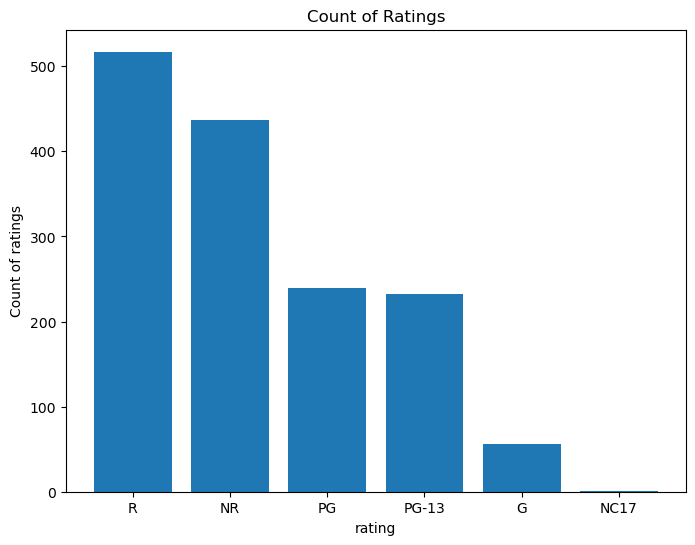

In [579]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(movie_ratings.index, movie_ratings.values)

ax.set_xlabel('rating')
ax.set_ylabel('Count of ratings')
ax.set_title('Count of Ratings');

#### 3. im.db Dataset

In [581]:
#load the movie_ratings table from the SQLite
conn = sqlite3.connect('data\im.db')
pd.read_sql(""" 
SELECT *
  FROM movie_ratings                                               
;
""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [589]:
#Calculate the average rating 
pd.read_sql(""" 
SELECT 
      AVG(averagerating) AS AVG_Rating
  FROM movie_ratings                                                           
;
""",conn)

,AVG_Rating
0,6.332729


In [593]:
#Only select the movies with an averagerating of the average rating.
pd.read_sql(""" 
SELECT *
  FROM movie_ratings 
WHERE averagerating >= 6.33          
ORDER BY numvotes DESC                                                                    
;
""",conn)

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
39796,tt8315244,7.8,5
39797,tt8366254,7.4,5
39798,tt8420530,6.8,5
39799,tt9367004,8.2,5


In [596]:
#Load the movie_basics table
pd.read_sql(""" 
SELECT *
 FROM movie_basics
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [606]:
#left merge the tables movie_basics and movie ratings
merged_basics_ratings = pd.read_sql(""" 
SELECT primary_title, runtime_minutes, genres, averagerating, numvotes
  FROM movie_basics
LEFT JOIN movie_ratings
  USING(movie_id) 
ORDER BY averagerating DESC                                                      
;
""",conn)
#Drop the rows with null values
merged_basics_ratings.dropna()

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Exteriores: Mulheres Brasileiras na Diplomacia,52.0,Documentary,10.0,5.0
1,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0,5.0
2,Freeing Bernie Baran,100.0,"Crime,Documentary",10.0,5.0
3,Hercule contre Hermès,72.0,Documentary,10.0,5.0
4,I Was Born Yesterday!,31.0,Documentary,10.0,6.0
...,...,...,...,...,...
73850,Pup Scouts,72.0,Animation,1.0,5.0
73851,La Scelta Impossibile,64.0,Drama,1.0,5.0
73852,Overdose of Gore: Crime born Crime,46.0,Horror,1.0,21.0
73854,The Defender,88.0,Drama,1.0,16.0


In [611]:
#check the 10 movies with the highest number of votes
highest_num_votes = pd.read_sql(""" 
SELECT primary_title, 
       runtime_minutes, 
       genres, 
       averagerating, 
       numvotes
  FROM movie_basics
LEFT JOIN movie_ratings
  USING(movie_id) 
GROUP BY genres            
ORDER BY numvotes DESC                                                      
LIMIT 10;
""",conn)
highest_num_votes

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
1,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2,Prometheus,124.0,"Adventure,Mystery,Sci-Fi",7.0,538720
3,Life of Pi,127.0,"Adventure,Drama,Fantasy",7.9,535836
4,Limitless,105.0,"Mystery,Sci-Fi,Thriller",7.4,492490
5,Source Code,93.0,"Action,Drama,Sci-Fi",7.5,452036
6,Harry Potter and the Deathly Hallows: Part 1,146.0,"Adventure,Fantasy,Mystery",7.7,425530
7,Scott Pilgrim vs. the World,112.0,"Action,Comedy,Fantasy",7.5,339338
8,The Equalizer,132.0,"Action,Crime,Thriller",7.2,302302
9,Hugo,126.0,"Adventure,Drama,Family",7.5,284869
